## Supervised Machine Learning Algorithms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline

X.shape: (26, 2)


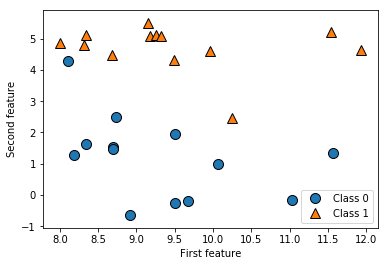

In [2]:
# forge dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4) 
plt.xlabel("First feature") 
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

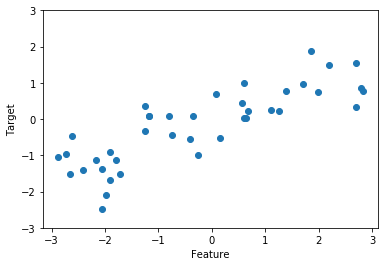

In [3]:
# wave dataset
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
# breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))
print('===============')
#print('description: \n{}'.format(cancer['DESCR']))
#print('===============')
print('feature names: \n{}'.format(cancer['feature_names']))
print('===============')
print('first 5 rows of data: \n{}'.format(cancer['data'][:3]))
print('===============')
print('shape of the data: {}'.format(cancer['data'].shape))
print('===============')
print("Sample counts per class:\n{}".format({
    n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
first 5 rows of data: 
[[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
    1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
    2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
    8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
    5.37300000e-02   1.58700000e-02   

In [5]:
# Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))
print('Feature names: \n{}'.format(boston.feature_names))
print(boston.DESCR)

Data shape: (506, 13)
Feature names: 
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radi

For our purposes here, we will actually expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (also called interactions) between features.

In [6]:
# load extended dataset with interaction terms between features
X, y = mglearn.datasets.load_extended_boston() 
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


### k-Nearest Neighbors

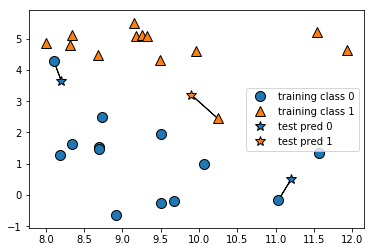

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

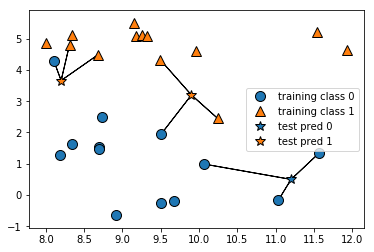

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [9]:
# Apply knn using sklearn
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print('Test set prediction: \n{}'.format(clf.predict(X_test)))
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set prediction: 
[1 0 1 0 1 0 0]
Test set accuracy: 0.86


#### Analyzing KNeighborsClassifier

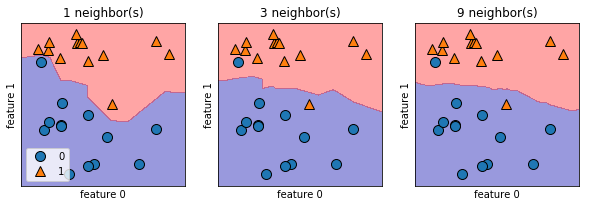

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity, and using many neighbors corresponds to low model complexity. If you consider the extreme case where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors (all training points) and all predictions would be the same: the class that is most frequent in the training set.

Training accuracy: 
 ['1.00', '0.98', '0.96', '0.96', '0.95', '0.95', '0.94', '0.94', '0.93', '0.94']
Testing accuracy: 
 ['0.90', '0.89', '0.92', '0.92', '0.92', '0.94', '0.93', '0.93', '0.92', '0.92']


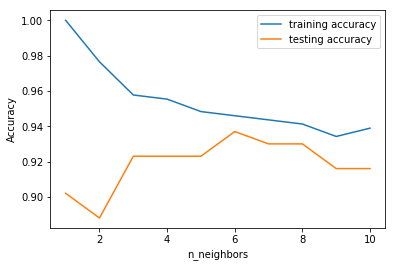

In [11]:
# apply the method to Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'], cancer['target'], stratify=cancer['target'], random_state=66)

train_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)
for n_neighbor in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbor)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

print('Training accuracy: \n', ['{:.2f}'.format(x) for x in train_accuracy])
print('Testing accuracy: \n', ['{:.2f}'.format(x) for x in test_accuracy])

plt.plot(neighbors_settings, train_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label='testing accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data. **This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets)**. So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features. The method we discuss next has neither of these drawbacks.

### Linear Regression

If you compare the predictions made by the straight line with those made by the KNeighborsRegressor, using a straight line to make predictions seems very restrictive. It looks like all the fine details of the data are lost. In a sense, this is true. It is a strong (and somewhat unrealistic) assumption that our target y is a linear combination of the features. But looking at one-dimensional data gives a somewhat skewed perspective. For datasets with many features, linear models can be very pow‐ erful. In particular, if you have more features than training data points, any target y can be perfectly modeled (on the training set) as a linear function.

#### Linear Regression (OLS)

In [12]:
# apply linear regression on wave data
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print('lr.coef_: {:.4f}'.format(lr.coef_[0]))
print('lr.intercept_: {:.4f}'.format(lr.intercept_))
print('Training set score: {}'.format(lr.score(X_train, y_train)))
print('Test set score: {}'.format(lr.score(X_test, y_test)))

lr.coef_: 0.3939
lr.intercept_: -0.0318
Training set score: 0.6700890315075756
Test set score: 0.65933685968637


*scikit-learn always stores anything that is derived from the training data in attributes that end with a trailing underscore. That is to separate them from parameters that are set by the user.*

In [13]:
# apply linear regression on Boston Housing data
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print('Training set score: {}'.format(lr.score(X_train, y_train)))
print('Test set score: {}'.format(lr.score(X_test, y_test)))

Training set score: 0.9523526436864239
Test set score: 0.6057754892935469


This discrepancy between performance on the training set and the test set is a clear sign of overfitting, and therefore we should try to find a model that allows us to con‐ trol complexity. One of the most commonly used alternatives to standard linear regression is ridge regression, which we will look into next.

#### Ridge Regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coef‐ ficients to be as small as possible; in other words, all entries of w should be close to zero. **Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well.** This constraint is an example of what is called regularization. **Regularization means explicitly restricting a model to avoid overfitting**. The particular kind used by ridge regression is known as L2 regularization.

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print('Training set score: {}'.format(ridge.score(X_train, y_train)))
print('Test set score: {}'.format(ridge.score(X_test, y_test)))

Training set score: 0.8860578560395836
Test set score: 0.7527139600306947


The Ridge model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the **alpha** parameter.

Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization. For example:


In [15]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [16]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


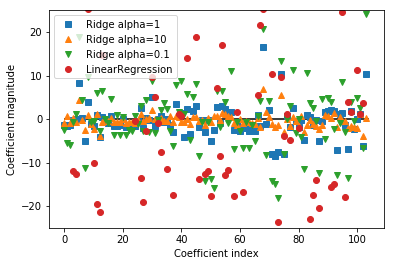

In [17]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


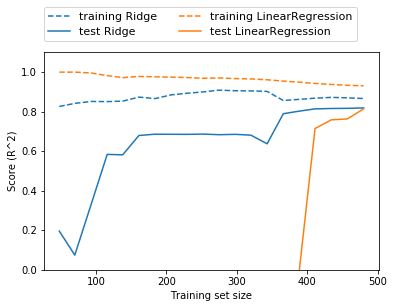

In [18]:
mglearn.plots.plot_ridge_n_samples()

As one would expect, the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board. However, the test score for ridge is better, particularly for small subsets of the data. For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here when using the full dataset is just by chance). Another interesting aspect is the decrease in training performance for linear regression. If more data is added, it becomes harder for a model to overfit, or memorize the data.

#### Lasso

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge regression, using the lasso also restricts coefficients to be close to zero, but in a slightly different way, called L1 regularization. **The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero**. This means some features are entirely ignored by the model. This can be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [19]:
# apply Lasso to extended Boston Housing dataset
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [20]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter. 
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))


Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [21]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


Text(0,0.5,'Coefficient magnitude')

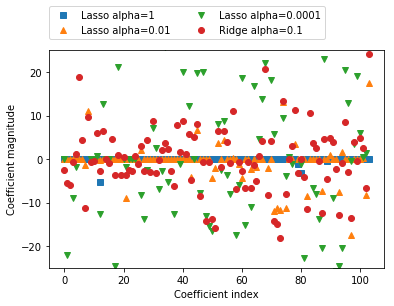

In [22]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In practice, ridge regression is usually the first choice between these two models. However, if you have a large amount of features and expect only a few of them to be important, Lasso might be a better choice. Similarly, if you would like to have a model that is easy to interpret, Lasso will provide a model that is easier to understand, as it will select only a subset of the input features. scikit-learn also provides the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice, this combination works best, though at the price of having two parameters to adjust: one for the L1 regularization, and one for the L2 regularization.

#### Linear Model for Classification

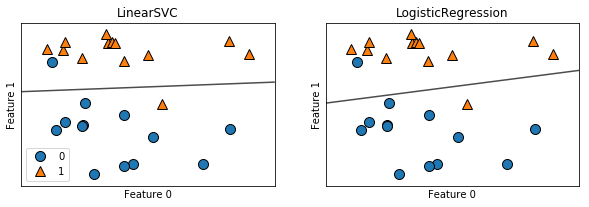

In [23]:
# apply LogisticRegression and LinearSVC to forge data
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                        ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")
axes[0].legend()

By default, both models apply an L2 regularization, in the same way that Ridge does for regression.

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C, and higher values of C correspond to less regularization.

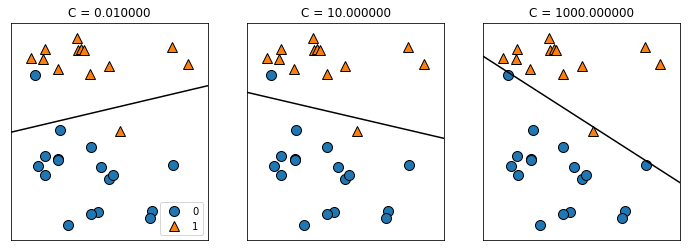

In [24]:
mglearn.plots.plot_linear_svc_regularization()

The strongly regularized model chooses a relatively horizontal line, misclassifying two points. In the center plot, C is slightly higher, and the model focuses more on the two misclassified samples, tilting the decision boundary. Finally, on the right‐hand side, the very high value of C in the model tilts the decision boundary a lot, now correctly classifying all points in class 0.

In [25]:
# apply LogisticRegression on breast cancer data
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify= cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


The default value of C=1 provides quite good performance, with 95% accuracy on both the training and the test set. But as training and test set performance are very close, it is likely that we are underfitting.

In [26]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score: {:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score: {:.3f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


#### Linear Model for Multi-Class Classification

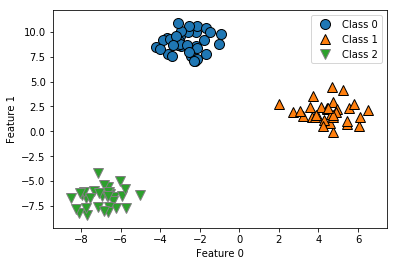

In [27]:
# apply one-vs-rest method
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [28]:
# use LinearSVC
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape) 
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


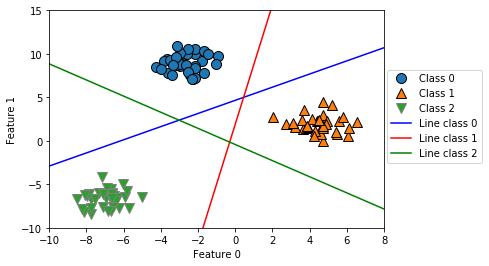

In [29]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

Text(0,0.5,'Feature 1')

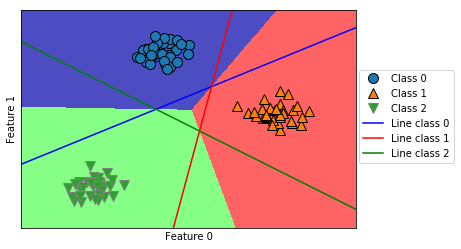

In [30]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression. Large values for alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale. The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

### Decision Trees

#### Building Decision Trees

Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data.

There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning). Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.

In [31]:
# apply decision tree to breast cancer data

from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print('Training set score: {}'.format(tree.score(X_train, y_train)))
print('Test set score: {}'.format(tree.score(X_test, y_test)))

Training set score: 1.0
Test set score: 0.9370629370629371


Limiting the depth of tree to decrease overfitting

In [32]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print('Accuracy on training set: {:.3f}'.format(tree.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyze Decision Trees

In [33]:
import graphviz
from sklearn.tree import export_graphviz
# export the graph as a .dot file
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], 
                feature_names=cancer.feature_names, impurity=False, filled=True)
# open the file
with open("tree.dot") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)

ModuleNotFoundError: No module named 'graphviz'

#### Feature Importance in Trees

In [34]:
print('Feature importance: \n{}'.format(tree.feature_importances_))

Feature importance: 
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


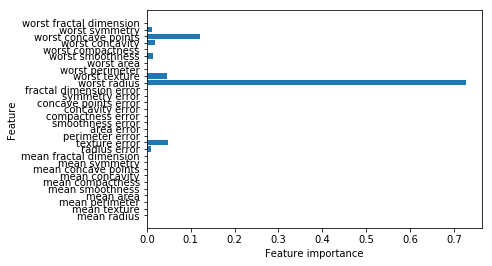

In [35]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

However, if a feature has a low feature_importance, it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.

The feature importances tell us that “worst radius” is important, but not whether a high radius is indicative of a sample being benign or malignant. 

The DecisionTreeRegressor (and all other tree-based regression models) is not able to extrapolate, or make predictions outside of the range of the training data.

Text(0,0.5,'Price in $/Mbyte')

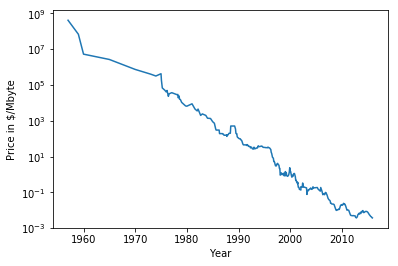

In [39]:
# analyze historical RAM prices
ram_prices = pd.read_csv('data/ram_price.csv')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [49]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)


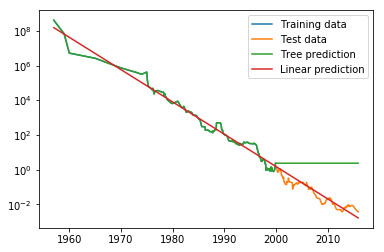

In [50]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The tree model makes perfect predictions on the training data; we did not restrict the complexity of the tree, so it learned the whole dataset by heart. However, once we leave the data range for which the model has data, the model simply keeps predicting the last known point. **The tree has no ability to generate “new” responses, outside of what was seen in the training data. This shortcoming applies to all models based on trees**.

It is actually possible to make very good forecasts with tree-based models (for example, when trying to predict whether a price will go up or down). The point of this example was not to show that trees are a bad model for time series, but to illustrate a particular property of how trees make predictions.


#### Strength, Weaknesses, and Parameters

The parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed:
* max_depth
* max_leaf_nodes
* min_samples_leaf

** Advantages:**
* The resulting model can easily be visualized and understood by nonexperts (at least for smaller trees)
* The algorithms are completely invariant to scaling of the data (As each feature is processed separately, and the possible splits of the data don’t depend on scaling)

** Disadvantages:**
* even with the use of pre-pruning, they tend to overfit and provide poor generalization performance.

### Ensembles of Decision Trees

#### Random Forests

A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results.

There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by select‐ ing the features in each split test. 

#### Building Random Forests
* Take bootstrap samples of the data: from n_samples data points, we repeatedly draw an example randomly with replacement, n_samples times. 
* When building a decision tree, instead of looking for the best test for each node, in each node the algorithm randomly selects a subset of the features, and it looks for the best possible test involving one of these features. This selection of a subset of features is repeated separately in each node, so that each node in a tree can make a decision using a different subset of the features.

The bootstrap sampling leads to each decision tree in the random forest being built on a slightly different dataset. Because of the selection of features in each node, each split in each tree operates on a different subset of features. Together, these two mechanisms ensure that all the trees in the random forest are different.

A critical parameter in this process is max_features. If we set max_features to n_features, that means that each split can look at all features in the dataset, and no randomness will be injected in the feature selection (the randomness due to the bootstrapping remains, though). If we set max_features to 1, that means that the splits have no choice at all on which feature to test, and can only search over different thresholds for the feature that was selected randomly. Therefore, a high max_features means that the trees in the random forest will be quite similar, and they will be able to fit the data easily, using the most distinctive features. A low max_features means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well.



In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

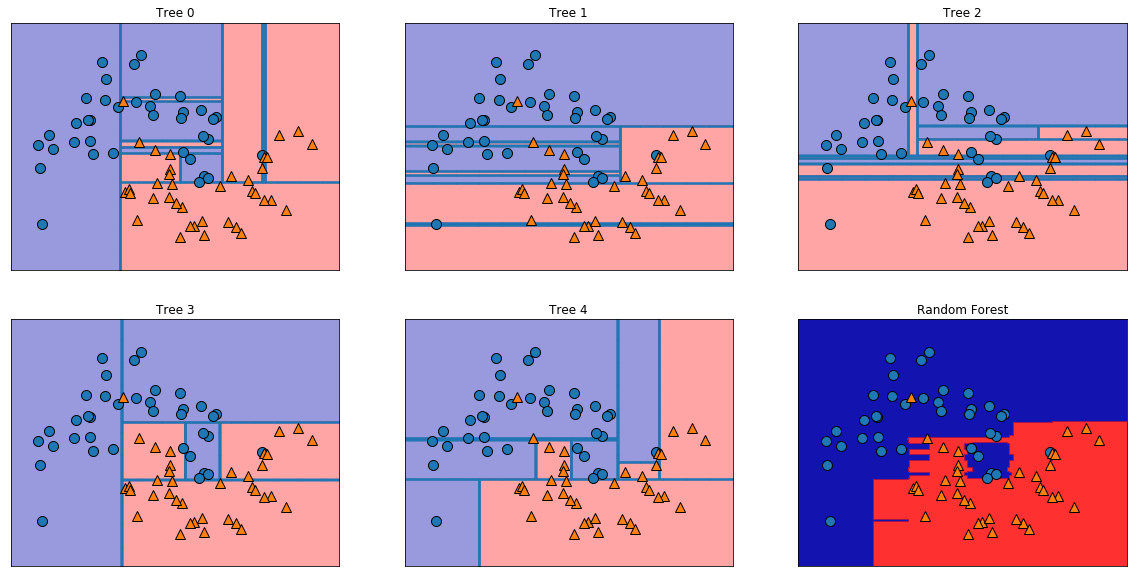

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [54]:
# apply random forest to Breast Cancer data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
print('Accuracy on training set: {:.3f}'.format(forest.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(forest.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.944


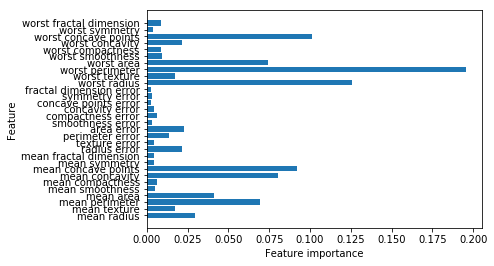

In [55]:
plot_feature_importances_cancer(forest)

#### Gradient Boosted Regression Trees

In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster.

Apart from the pre-pruning and the number of trees in the ensemble, another important parameter of gradient boosting is the **learning_rate**, which controls how strongly each tree tries to correct the mistakes of the previous trees. A higher learning rate means each tree can make stronger corrections, allowing for more complex models. Adding more trees to the ensemble, which can be accomplished by increasing n_estimators, also increases the model complexity, as the model has more chances to correct mistakes on the training set.

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print('Training set accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test set accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

Training set accuracy: 1.000
Test set accuracy: 0.958


In [60]:
# reduce overfit by setting max_depth and learning rate
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print('Training set accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test set accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print('Training set accuracy: {:.3f}'.format(gbrt.score(X_train, y_train)))
print('Test set accuracy: {:.3f}'.format(gbrt.score(X_test, y_test)))

Training set accuracy: 0.995
Test set accuracy: 0.965
Training set accuracy: 0.995
Test set accuracy: 0.944


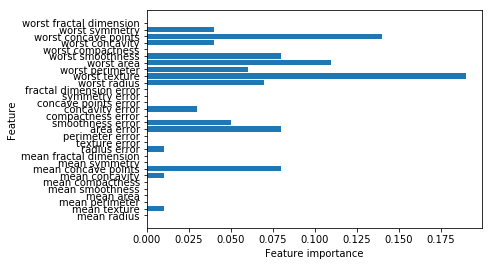

In [62]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)